In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
sys.path.append('..')

In [25]:
from magnet_pinn.data.dataset import MagnetIterator
import tqdm

In [36]:
from magnet_pinn.data.grid import MagnetGridIterator
iterator = MagnetGridIterator(
    "../data/processed/train/grid_voxel_size_4_data_type_float32",
    phase_samples_per_simulation=2,
)

In [ ]:
import torch
def worker_init_fn(worker_id):
     worker_info = torch.utils.data.get_worker_info()
     dataset = worker_info.dataset  # the dataset copy in this worker process
     overall_simulations = dataset.simulation_list
     num_workers = worker_info.num_workers

     # configure the dataset to only process the split workload
     worker_id = worker_info.id
     worker_simulations = overall_simulations[worker_id::num_workers]
     dataset.simulation_list = worker_simulations

In [37]:
from torch.utils.data import DataLoader

In [38]:
dl = DataLoader(iterator, batch_size=1, num_workers=2)

In [40]:
for item in tqdm.tqdm(dl):
    print(item['simulation'])

 17%|█▋        | 1/6 [00:01<00:06,  1.29s/it]

['children_0_tubes_0_id_9619']


 33%|███▎      | 2/6 [00:01<00:02,  1.50it/s]

['children_0_tubes_0_id_7151']


 67%|██████▋   | 4/6 [00:03<00:01,  1.53it/s]

['children_0_tubes_0_id_9619']
['children_0_tubes_0_id_7151']


 83%|████████▎ | 5/6 [00:04<00:01,  1.07s/it]

['children_0_tubes_0_id_7586']
['children_0_tubes_0_id_9619']


/home/andi/coding/magnet/magnet-pinn/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:718: UserWarning: Length of IterableDataset <magnet_pinn.data.grid.MagnetGridIterator object at 0x7a0b4dd6dfd0> was reported to be 6(when accessing len(dataloader)), but 7 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
7it [00:06,  1.03s/it]                       /home/andi/coding/magnet/magnet-pinn/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:718: UserWarning: Length of IterableDataset <magnet_pinn.data.grid.MagnetGridIterator object at 0x7a0b4dd6dfd0> was reported to be 6(when accessing len(dataloader)), but 8 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDat

['children_0_tubes_0_id_7586']
['children_0_tubes_0_id_9619']


/home/andi/coding/magnet/magnet-pinn/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:718: UserWarning: Length of IterableDataset <magnet_pinn.data.grid.MagnetGridIterator object at 0x7a0b4dd6dfd0> was reported to be 6(when accessing len(dataloader)), but 9 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
9it [00:08,  1.07it/s]/home/andi/coding/magnet/magnet-pinn/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:718: UserWarning: Length of IterableDataset <magnet_pinn.data.grid.MagnetGridIterator object at 0x7a0b4dd6dfd0> was reported to be 6(when accessing len(dataloader)), but 10 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each w

['children_0_tubes_0_id_7151']
['children_0_tubes_0_id_7586']


/home/andi/coding/magnet/magnet-pinn/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:718: UserWarning: Length of IterableDataset <magnet_pinn.data.grid.MagnetGridIterator object at 0x7a0b4dd6dfd0> was reported to be 6(when accessing len(dataloader)), but 11 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each worker. Please see https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for examples.
  warnings.warn(warn_msg)
11it [00:10,  1.03it/s]/home/andi/coding/magnet/magnet-pinn/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:718: UserWarning: Length of IterableDataset <magnet_pinn.data.grid.MagnetGridIterator object at 0x7a0b4dd6dfd0> was reported to be 6(when accessing len(dataloader)), but 12 samples have been fetched. For multiprocessing data-loading, this could be caused by not properly configuring the IterableDataset replica at each

['children_0_tubes_0_id_7151']
['children_0_tubes_0_id_7586']


12it [00:10,  1.15it/s]


In [ ]:
summed = np.sum(np.pow(np.abs(values), 2), axis=(0, -1))

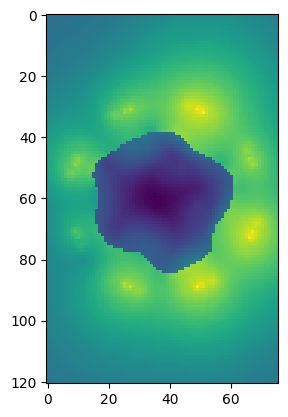

In [ ]:
plt.imshow(
    summed[:, :, 35],
    norm=LogNorm()
)